# 1. Importowanie bibliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# 2. Ładowanie danych

In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Eksploracja danych

In [4]:
data.info()
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64


# 3.1 Podział na dane testowe i treningowe

In [5]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
train_data = x_train.join(y_train)

In [8]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15022,-117.00,32.77,30.0,1802.0,401.0,776.0,386.0,2.8125,<1H OCEAN,173500.0
1814,-122.31,37.91,43.0,2549.0,511.0,1060.0,528.0,3.6417,NEAR BAY,178400.0
19460,-120.98,37.69,18.0,3176.0,468.0,1296.0,471.0,5.5684,INLAND,185100.0
10127,-117.88,33.93,17.0,6100.0,861.0,2771.0,866.0,7.6486,<1H OCEAN,306700.0
13575,-117.29,34.14,39.0,1989.0,401.0,805.0,341.0,2.4250,INLAND,90000.0
...,...,...,...,...,...,...,...,...,...,...
9992,-121.11,39.09,16.0,1000.0,197.0,508.0,190.0,2.3062,INLAND,138800.0
7353,-118.15,33.96,33.0,1201.0,340.0,1482.0,334.0,2.4821,<1H OCEAN,150000.0
7344,-118.15,33.97,32.0,927.0,250.0,970.0,248.0,2.1591,<1H OCEAN,181500.0
16089,-122.48,37.71,43.0,3850.0,1018.0,1497.0,829.0,3.5296,NEAR OCEAN,400000.0


# 3.2 Histogramy cech danych

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

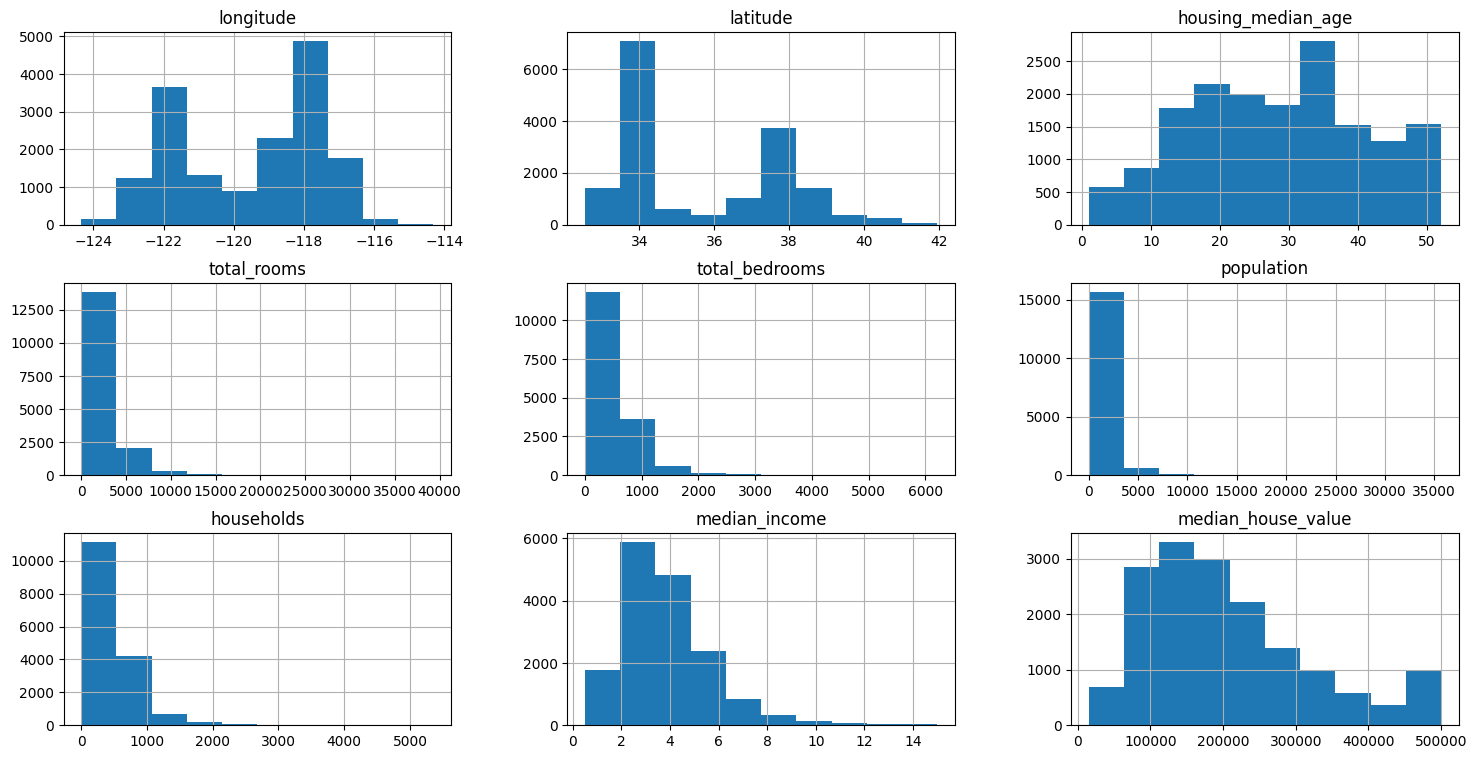

In [9]:
train_data.hist(figsize=(18, 9))

# 3.3 Mapa termiczna korelacji

<Axes: >

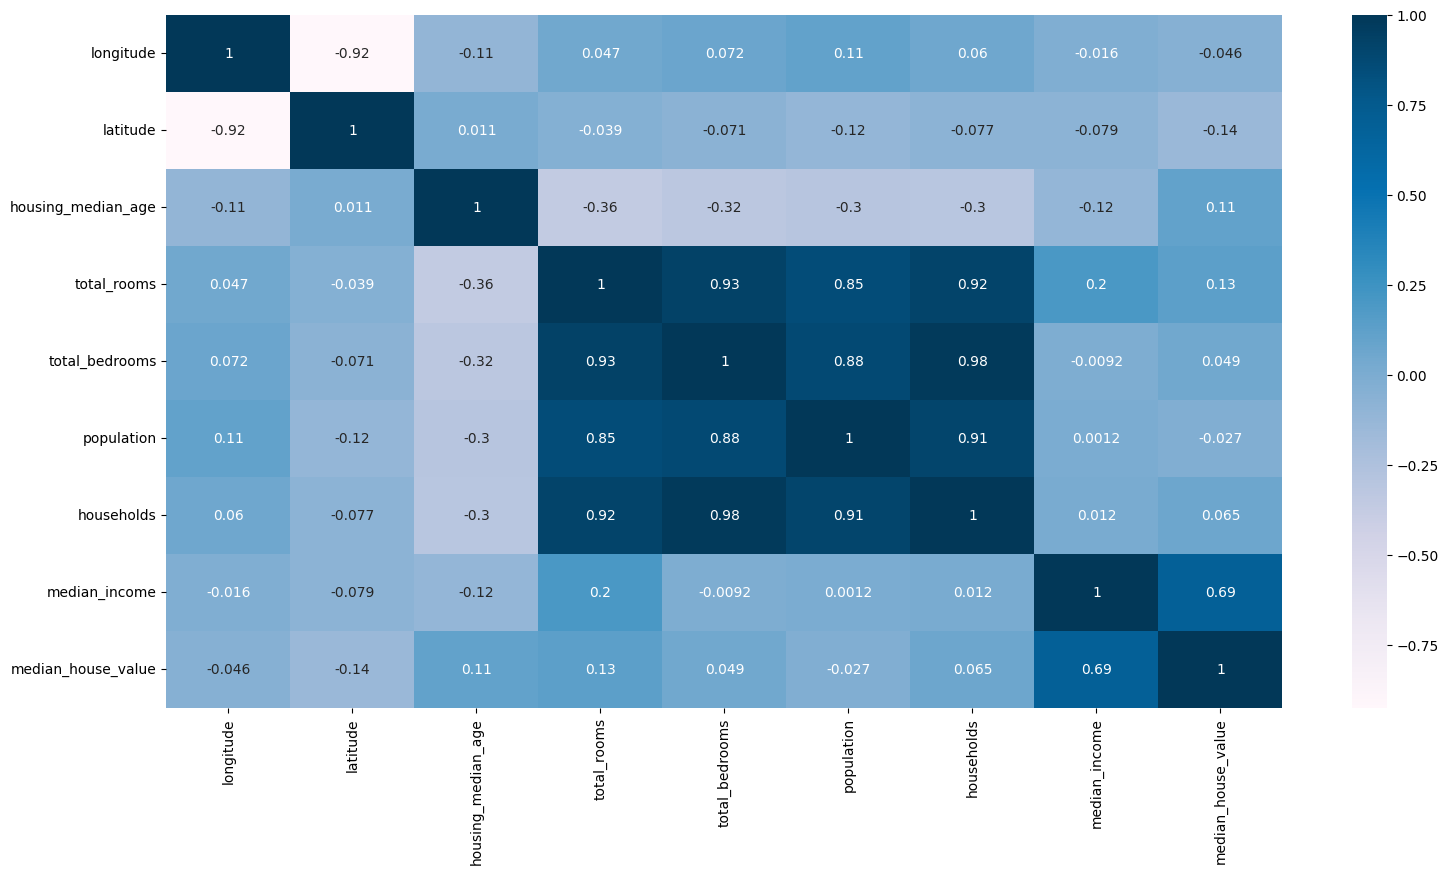

In [10]:
excluded_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(18,9))
sns.heatmap(excluded_train_data.corr(), annot=True, cmap="PuBu")

# 4. Wstępne przetrwarzanie danych 

In [11]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

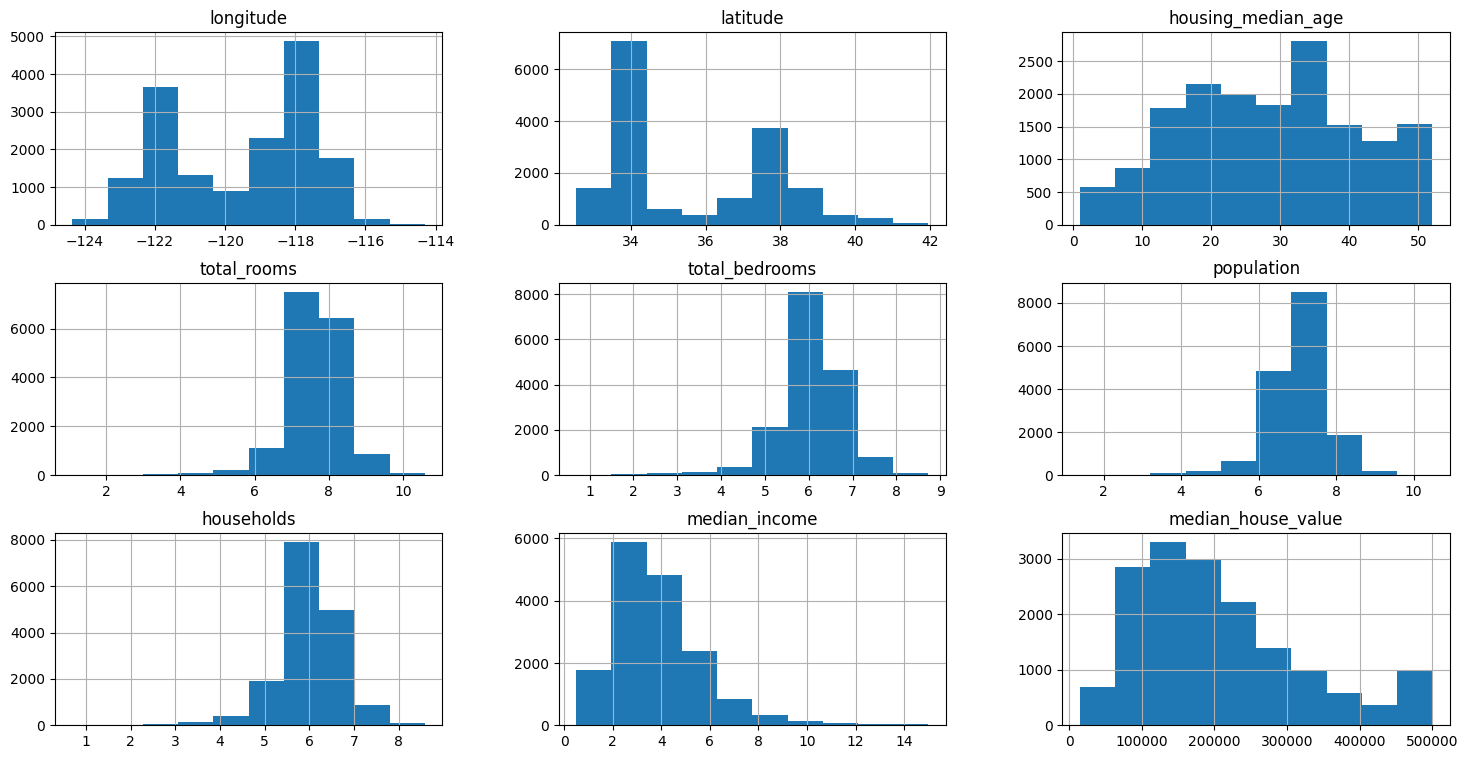

In [12]:
train_data.hist(figsize=(18, 9))

# 4.1 Dummy coding

In [13]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7222
INLAND        5226
NEAR OCEAN    2086
NEAR BAY      1808
ISLAND           4
Name: count, dtype: int64

In [14]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

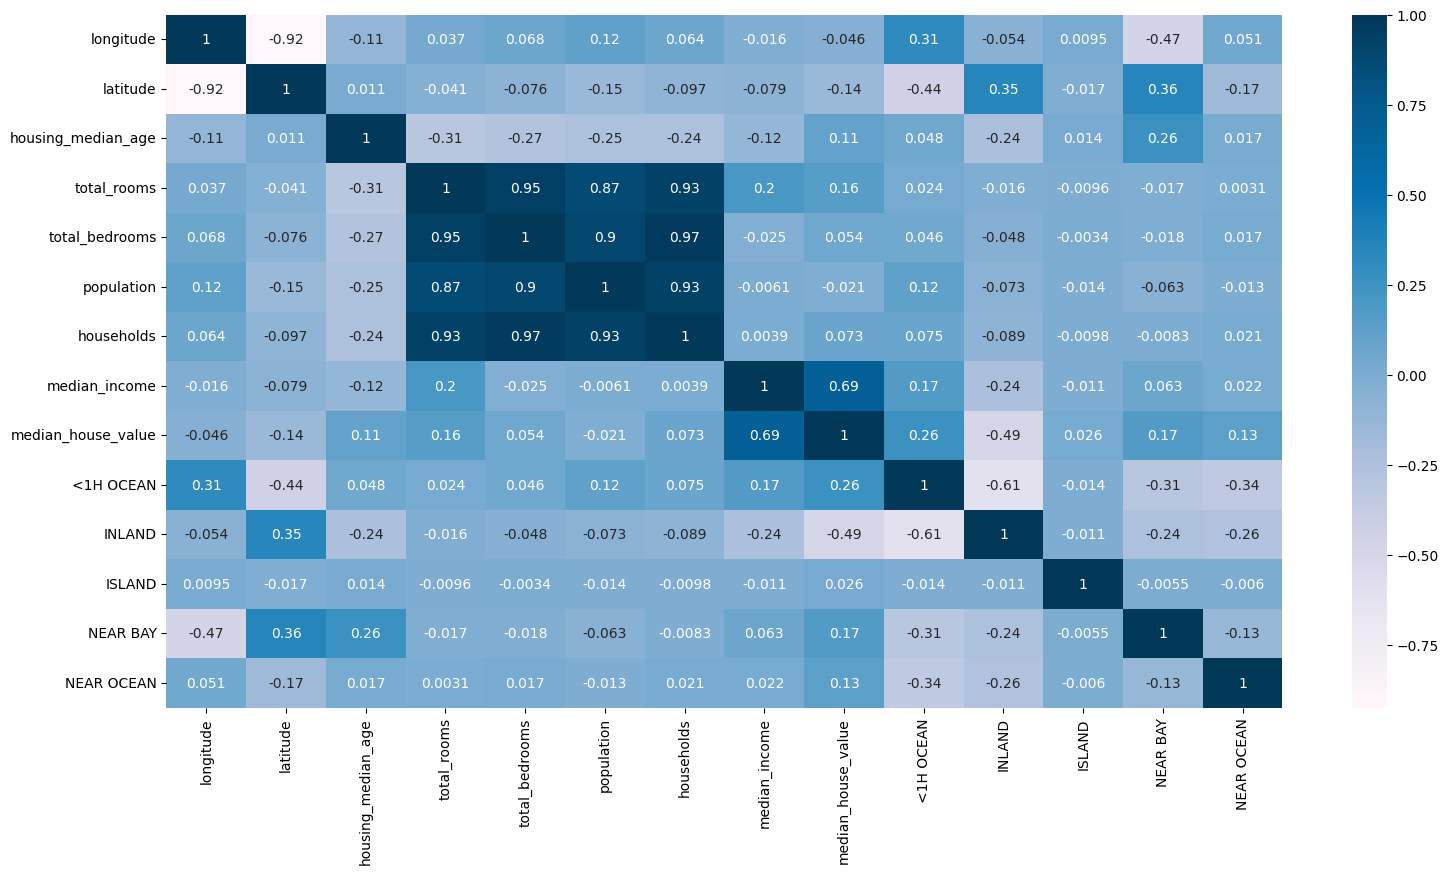

In [15]:
plt.figure(figsize = (18, 9))
sns.heatmap(train_data.corr(), annot=True, cmap= "PuBu")

<Axes: xlabel='latitude', ylabel='longitude'>

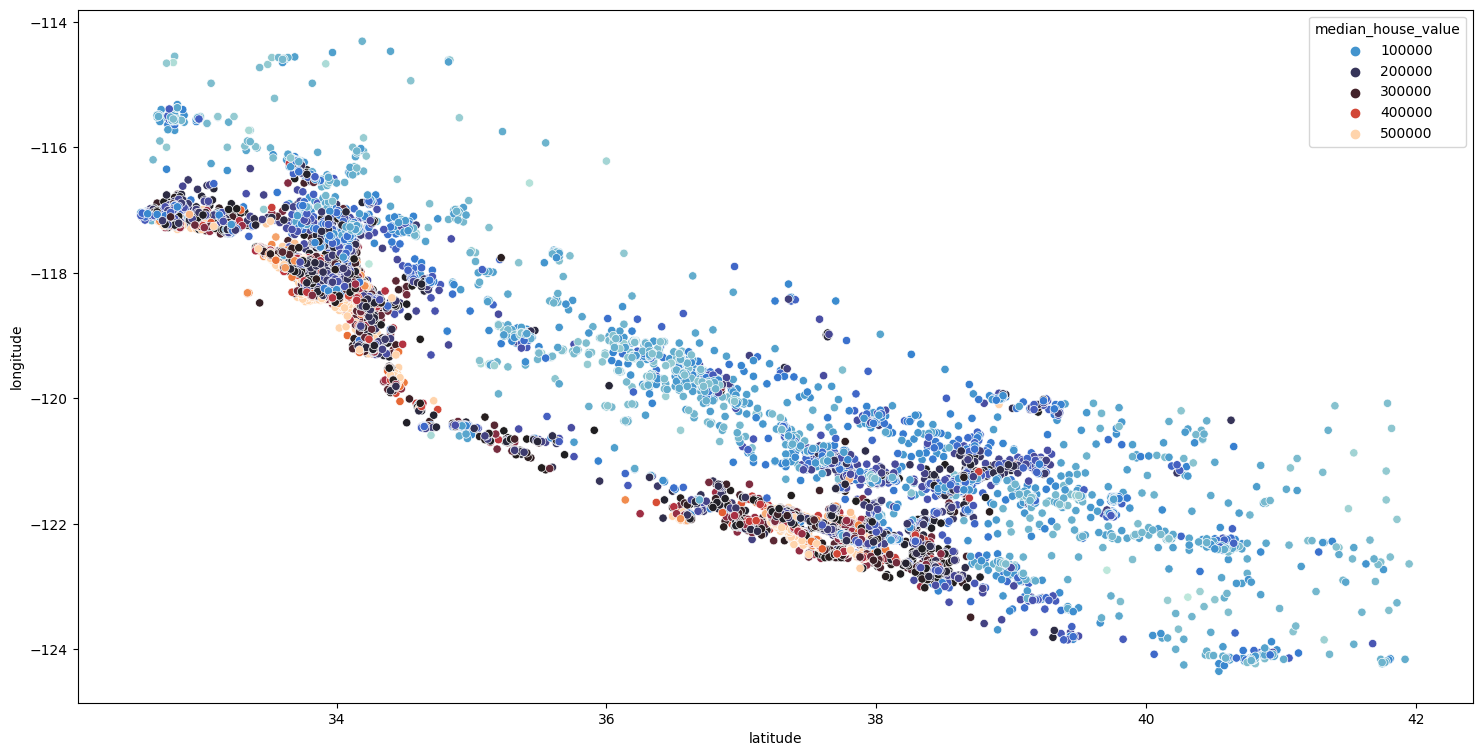

In [16]:
plt.figure(figsize=(18,9))
sns.scatterplot(x="latitude", y="longitude", data =train_data, hue="median_house_value", palette="icefire")

# 5. Inżynieria cech (feature engineering)

In [17]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

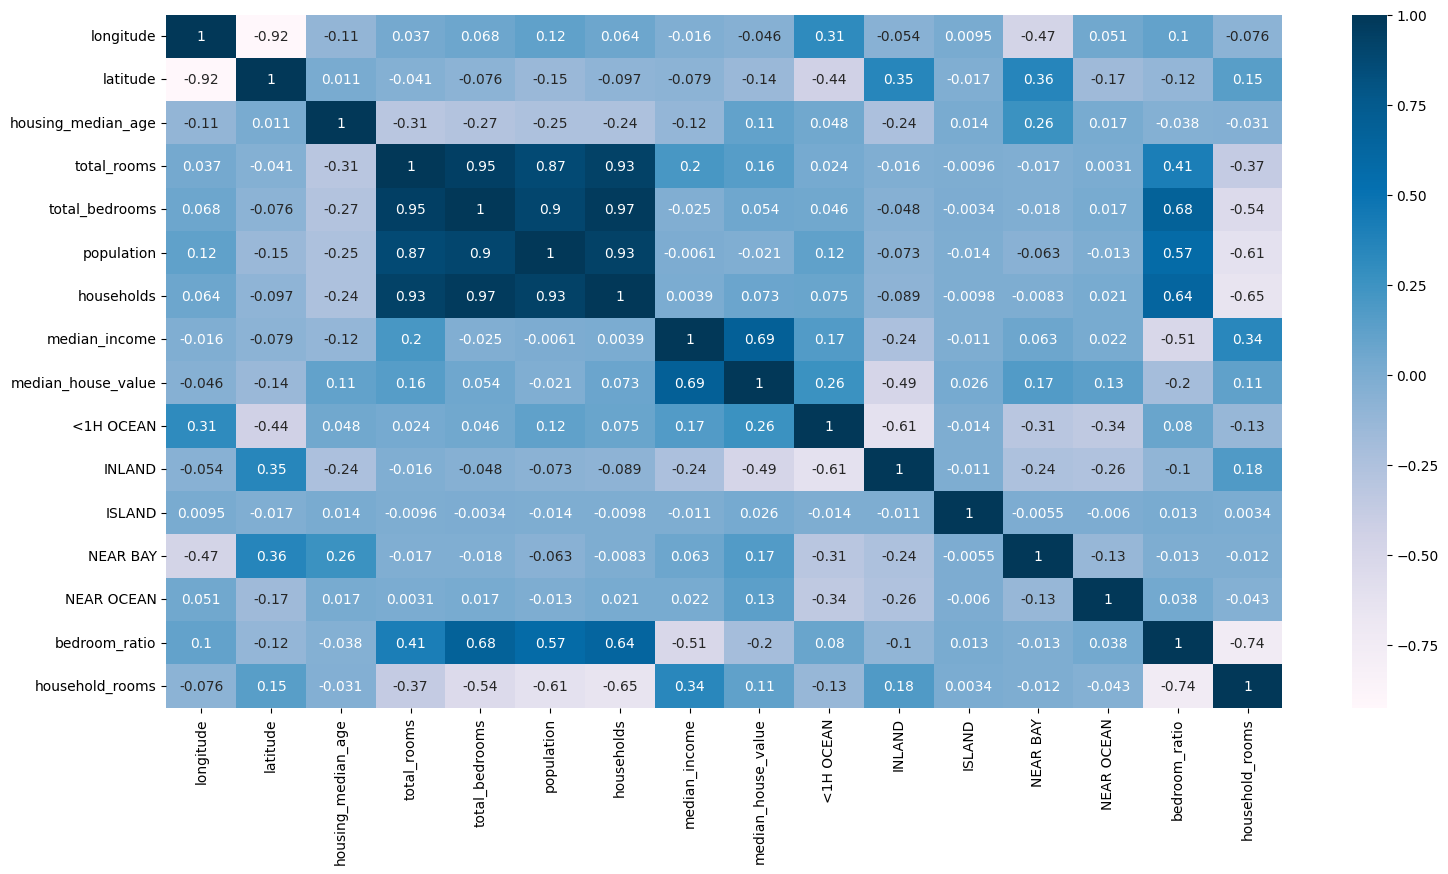

In [18]:
plt.figure(figsize = (18, 9))
sns.heatmap(train_data.corr(), annot=True, cmap= "PuBu")

In [19]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15022,-117.00,32.77,30.0,7.497207,5.996452,6.655440,5.958425,2.8125,173500.0,True,False,False,False,False,0.799825,1.258253
1814,-122.31,37.91,43.0,7.843849,6.238325,6.966967,6.270988,3.6417,178400.0,False,False,False,True,False,0.795314,1.250815
19460,-120.98,37.69,18.0,8.063693,6.150603,7.167809,6.156979,5.5684,185100.0,False,True,False,False,False,0.762753,1.309683
10127,-117.88,33.93,17.0,8.716208,6.759255,7.927324,6.765039,7.6486,306700.0,True,False,False,False,False,0.775481,1.288419
13575,-117.29,34.14,39.0,7.595890,5.996452,6.692084,5.834811,2.4250,90000.0,False,True,False,False,False,0.789434,1.301823


# 6. Model regresji liniowej

In [20]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_scaled = scaler.fit_transform(x_train)

housing_reg = LinearRegression()
housing_reg.fit(x_train_scaled, y_train)

LinearRegression()

LinearRegression()

In [21]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [22]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
16634,-120.84,35.31,23.0,8.039480,6.403574,7.323831,6.413459,2.8493,196100.0,False,False,False,False,True,0.796516,1.253533
2631,-124.27,40.69,36.0,7.762171,6.270988,7.085901,6.144186,2.5179,79000.0,False,False,False,False,True,0.807891,1.263336
14326,-117.16,32.71,52.0,6.740519,6.113682,7.115582,5.929589,1.0918,22500.0,False,False,False,False,True,0.907005,1.136760
19655,-120.86,37.49,22.0,7.669028,6.100319,7.273786,6.016157,2.4706,89400.0,False,True,False,False,False,0.795449,1.274739
11364,-117.94,33.73,24.0,8.342364,6.577861,7.811568,6.572283,5.2563,211400.0,True,False,False,False,False,0.788489,1.269325


In [23]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [24]:
x_test_scaled = scaler.transform(x_test)

In [25]:
housing_reg.score(x_test_scaled, y_test)

0.6830468070796512

# 6.1 Porównanie danych testowych i treningowych- wizualizacja modelu 

In [26]:
y_pred_train = housing_reg.predict(x_train_scaled)

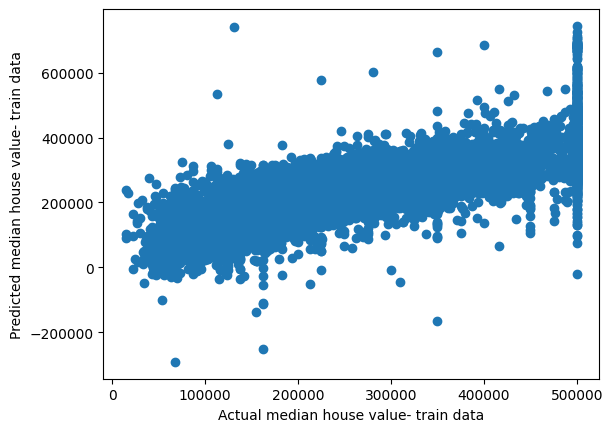

In [27]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual median house value- train data")
plt.ylabel("Predicted median house value- train data")
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.6678696884120048

In [29]:
y_pred_test = housing_reg.predict(x_test_scaled)

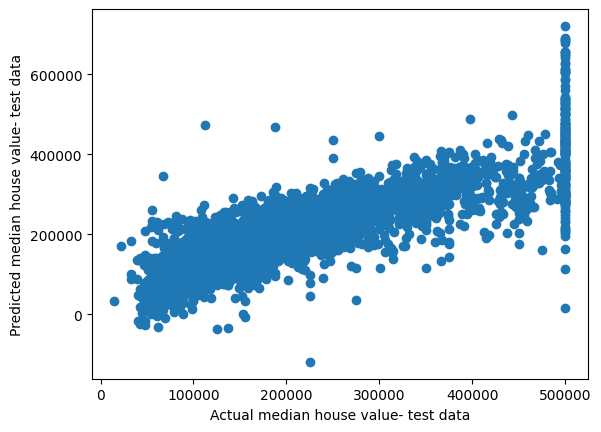

In [30]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual median house value- test data")
plt.ylabel("Predicted median house value- test data")
plt.show()

In [199]:
r2_score(y_test, y_pred_test)

0.6734296202392596

# 7. Las losowy (random forest) 

In [31]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()
forest.fit(x_train_scaled, y_train)

RandomForestRegressor()

RandomForestRegressor()

In [32]:
forest.score(x_test_scaled, y_test)

0.8168774460093048

# 7.1 Dostrajanie hiperparametrów (hyperparameter optimization)

In [202]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4,],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [203]:
best_forest = grid_search.best_estimator_

In [204]:
best_forest.score(x_test_scaled, y_test)

0.8218266754107066